# Project: Investigate No-show appointments Datest 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row:

  - ‘ScheduledDay’ tells us on what day the patient set up their appointment.
  - ‘Neighborhood’ indicates the location of the hospital.
  - ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
  - *Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if   they did not show up*.

### Research Questions 


**1. What are factors in order to predict if a patient will show up for their scheduled appointment?**

**2. what are a majors sectors which can effect on No. of patiants who showing up/ not showing up?**

**3. can you find direct relation between patiants which sowing up or not and many characteristics such as (Age,	Neighbourhood, scholarship, Hipertension, Diabetes, Alcoholism and Handcap)?**



In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


Matplotlib is building the font cache; this may take a moment.
UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, the Data will be Assesingn, Cleaning and Exploring with Visuals.

### General Properties

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**No. of rows & Coloums**

In [6]:
df.shape

(110527, 14)

**Some of data statistics**

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- Mean of ages is 37 years.
- Max of ages is 115 years.
- We have probably mistake in ages of patients due to min age is -1 and it doesn't make a scene. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


*No Missing Data*


### Data Cleaning

In [18]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace= True)

*Data after cleaned from useless dataset*

In [19]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


*Data after rename "No-show" to "No_show"*

In [30]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### General figures for all data

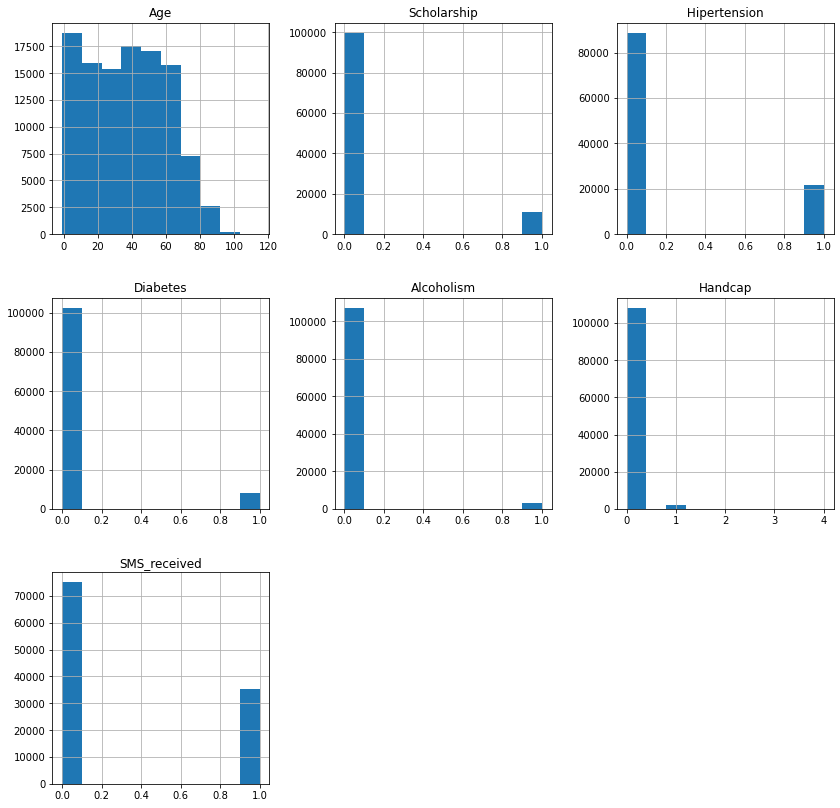

In [37]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(14, 14));

- Most patiants suffer from Diabetes and Hipertension more than Alcogolism and Handcap
- Around 50% patients received SMS
- Around 10% patients is enrolled in Scholarship Brasilian welfare program Bolsa Família.

### Showing up according to many chractrastices

In [38]:
#Redefine show and no show
show = df.No_show =="No"
noshow = df.No_show == 'Yes'


In [39]:
df[show].count()

Gender            88208
Age               88208
Neighbourhood     88208
Scholarship       88208
 Hipertension     88208
Diabetes          88208
Alcoholism        88208
Handcap           88208
SMS_received      88208
No_show           88208
dtype: int64

In [40]:
df[noshow].count()

Gender            22319
Age               22319
Neighbourhood     22319
Scholarship       22319
 Hipertension     22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
No_show           22319
dtype: int64

No of showed is around 4 times of No showed

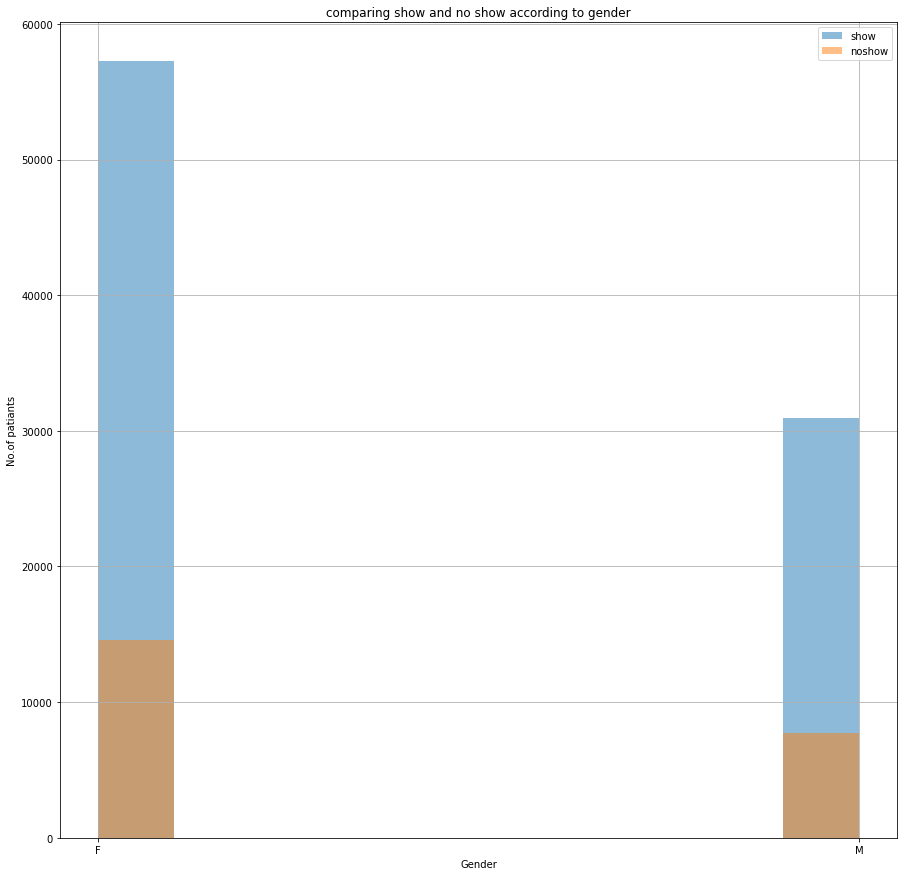

In [42]:
#comparing show and no show according to gender
plt.figure(figsize=(15, 15))
df.Gender[show].hist(alpha=0.5, label="show")
df.Gender[noshow].hist(alpha=0.5, label="noshow")
plt.legend()
plt.title('comparing show and no show according to gender')
plt.xlabel('Gender')
plt.ylabel('No.of patiants');                

*Gender not major in showing up, Gender of Female who showed and did not show more than male*

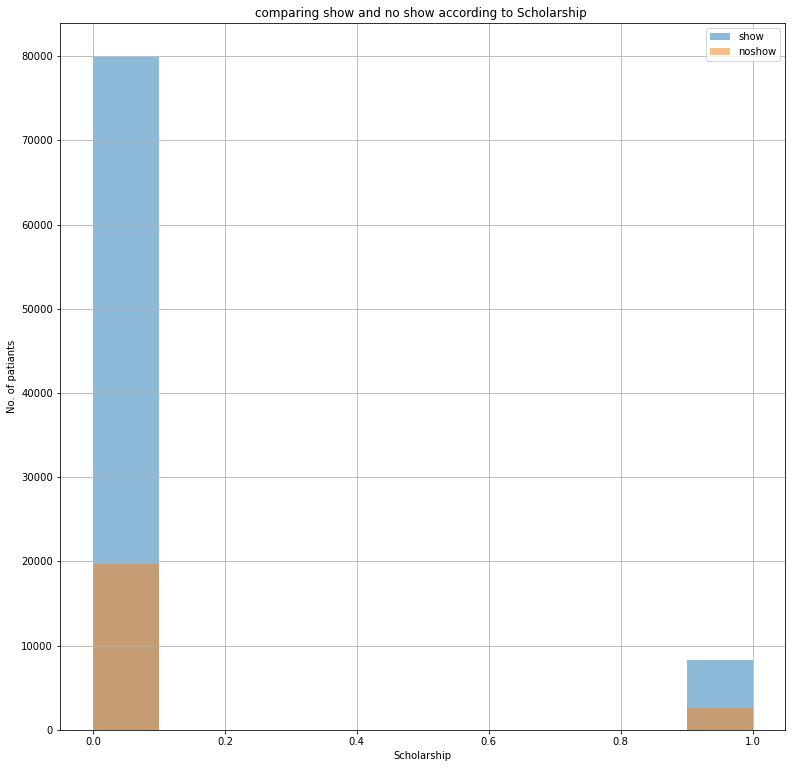

In [45]:
#comparing show and no show according to Scholarship
plt.figure(figsize=(13, 13))
df.Scholarship[show].hist(alpha=0.5, label="show")
df. Scholarship [noshow].hist(alpha=0.5, label="noshow")
plt.legend()
plt.title('comparing show and no show according to Scholarship ')
plt.xlabel('Scholarship')
plt.ylabel('No. of patiants');


*scholarship not major in showing up or not* 

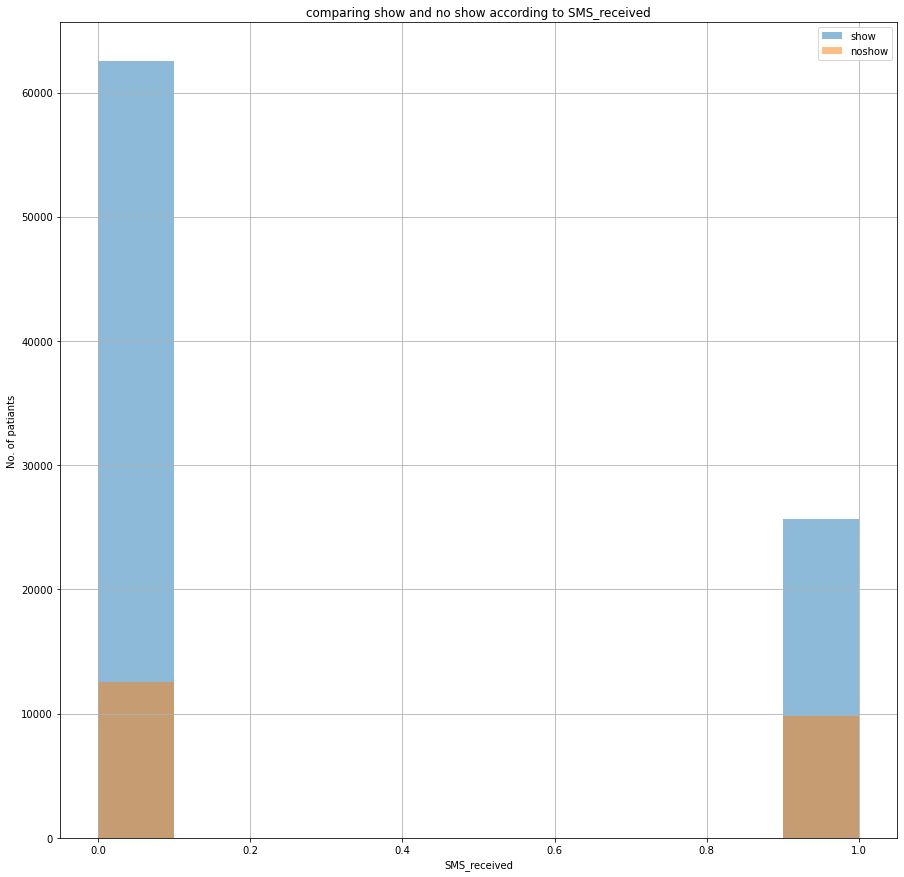

In [50]:
#comparing show and no show according to SMS_received
plt.figure(figsize=(15, 15))
df.SMS_received[show].hist(alpha=0.5, label="show")
df.SMS_received[noshow].hist(alpha=0.5, label="noshow")
plt.legend()
plt.title('comparing show and no show according to SMS_received')
plt.xlabel('SMS_received')
plt.ylabel('No. of patiants');


*More patients showed up without receive SMS as unusual, scholarship not major in showing up or not*

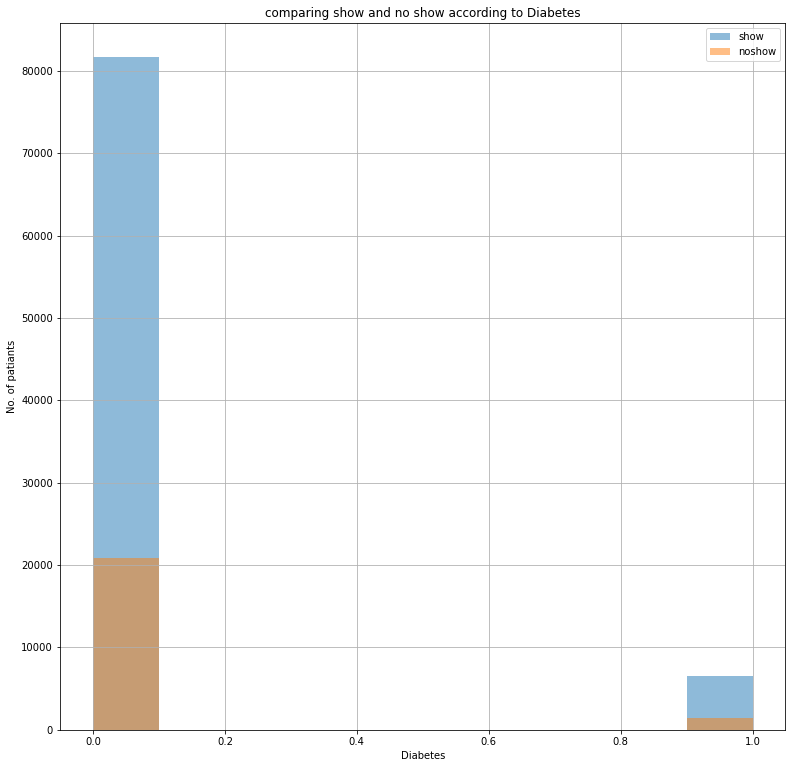

In [51]:
#comparing show and no show according to Diabetes
plt.figure(figsize=(13, 13))
df.Diabetes[show].hist(alpha=0.5, label="show")
df.Diabetes[noshow].hist(alpha=0.5, label="noshow")
plt.legend()
plt.title('comparing show and no show according to Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('No. of patiants');

*Diabetes not major in showing up or not* 

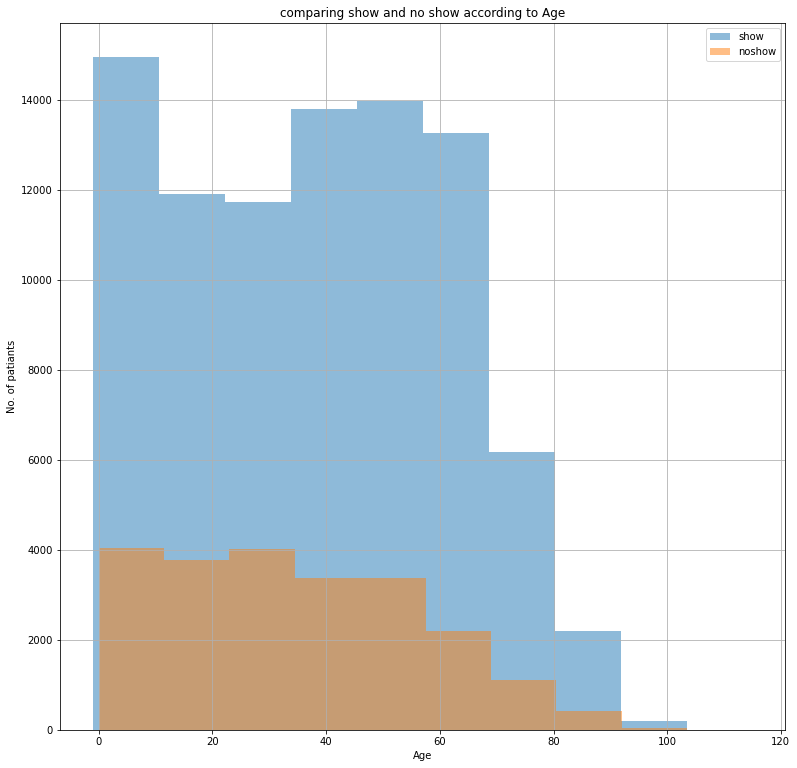

In [53]:
#comparing show and no show according to age
plt.figure(figsize=(13, 13))
df.Age[show].hist(alpha=0.5, label="show")
df.Age[noshow].hist(alpha=0.5, label="noshow")
plt.legend()
plt.title('comparing show and no show according to Age')
plt.xlabel('Age')
plt.ylabel('No. of patiants');

*patiant in the 0-10 age showed more than any ages then 30-75*

**when they get older, they have less show up for their scheduled appointment**

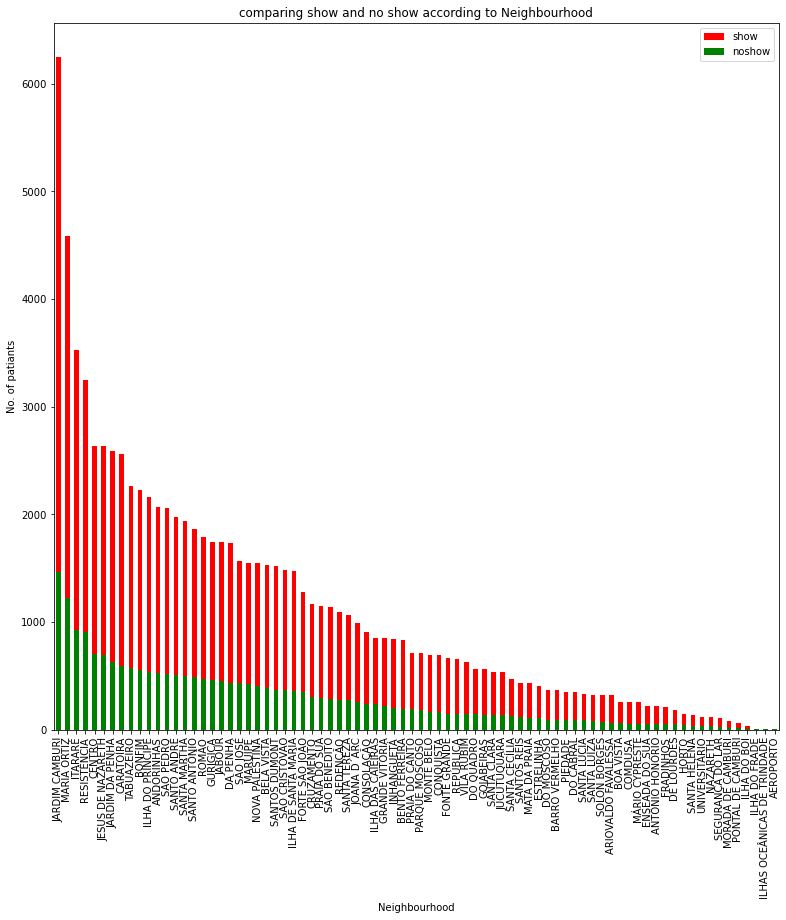

In [56]:
#comparing show and no show according to Neighbourhood
plt.figure(figsize=(13, 13))
df.Neighbourhood[show].value_counts().plot(kind="bar", color='red', label='show')
df.Neighbourhood[noshow].value_counts().plot(kind="bar", color='green', label='noshow')
plt.legend()
plt.title('comparing show and no show according to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('No. of patiants');

**Neighbourhood is a major sector can effect on No. of patiants who showing up**

<a id='conclusions'></a>
## Conclusions



- Neighbourhood is a major sector which can effect on No. of patiants who showing up
- patiant in the 0-10 age showed more than any ages then 30-75, when they get older, they have less show up for their scheduled appointment
- Gender of Female who showed and did not show more than male
- More patients showed up without receive SMS as unusual, scholarship not major in showing up or not
### Limitation



- couldn't find direct relation between patiants which sowing up or not and many characteristics such as scholarship, Hipertension, Diabetes, Alcoholism and Handcap
- scholarship, Hipertension, Diabetes, Alcoholism and Handcap aren't major sector which can not effect on No. of patiants which showing up***